In [66]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
pumpkin_data = scipy.io.loadmat('./data/pumpkin_reel1.mat')

In [68]:
pumpkin_data['data1'].shape

(480, 720, 3, 200)

In [69]:
pumpkin_sets = pumpkin_data['data1']

## Mean substraction

In [70]:
avg_pumpkin = np.mean(pumpkin_sets, axis = 3)

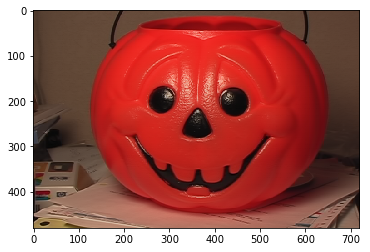

In [71]:
tmp = avg_pumpkin - np.min(avg_pumpkin)
tmp = tmp/np.max(tmp)
plt.imshow(tmp)
plt.show()

In [72]:
pumpkin_mean_sub = []
for i in range(200):
    pumpkin_mean_sub.append(pumpkin_sets[:, :, :, i] - avg_pumpkin)
pumpkin_mean_sub = np.array(pumpkin_mean_sub)

## PCA

In [73]:
# reshape data 
X = pumpkin_mean_sub.reshape(-1, 480*720*3).T

# first we get the eigenvectors of X.T*X and eigenvalues
w, V = np.linalg.eig(X.T @ X)

# arange eigenvectors based on values
V = V[:, np.flip(np.argsort(w), axis=0)]
w = w[np.flip(np.argsort(w), axis=0)]
E = np.diag(np.sqrt((w > 0).astype(np.int8) * w))  # change negative data to 0

# calculuate U
U = X@V@np.linalg.pinv(E)

In [76]:
U[:, 0]  # the first eigen vector

array([ -4.06137377e-05,  -3.18043157e-05,  -9.74751095e-06, ...,
        -1.86172304e-03,  -1.55538031e-03,  -1.31720474e-03])

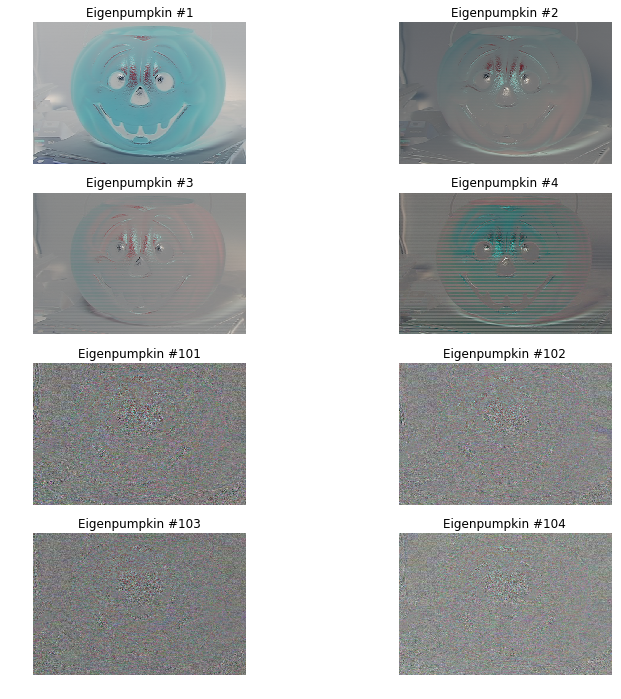

In [77]:
fig = plt.figure(figsize=(12, 12))
for i, ind in enumerate(list(range(4)) + list(range(100, 104))):
    x = np.copy(U[:, ind])
    x -= np.min(x)
    x = x / np.max(x)
    x = x.reshape(480, 720, 3)
    plt.subplot(4, 2, i+1)
    plt.axis('off')
    plt.title('Eigenpumpkin #%d' %(ind+1))
    plt.imshow(x)
plt.show()

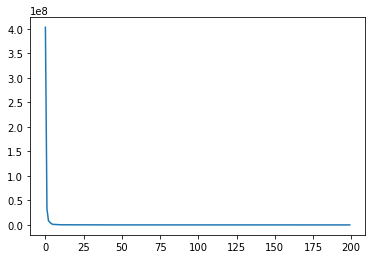

In [89]:
plt.plot(w/200)
plt.show()

## Thin SVD

In [79]:
U_svd, s, V = np.linalg.svd(X, full_matrices=False)

In [80]:
U_svd[:, 0]

array([ -4.06137377e-05,  -3.18043157e-05,  -9.74751095e-06, ...,
        -1.86172304e-03,  -1.55538031e-03,  -1.31720474e-03])

In [81]:
U[:, 0]

array([ -4.06137377e-05,  -3.18043157e-05,  -9.74751095e-06, ...,
        -1.86172304e-03,  -1.55538031e-03,  -1.31720474e-03])

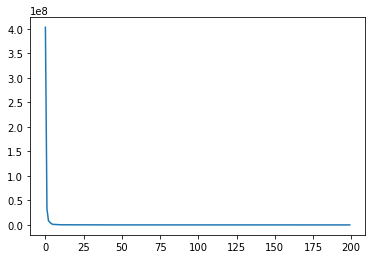

In [92]:
plt.plot(s**2/200)
plt.show()

## coefficients

In [82]:
transformed_X = np.dot(X.T, U[:, :2])

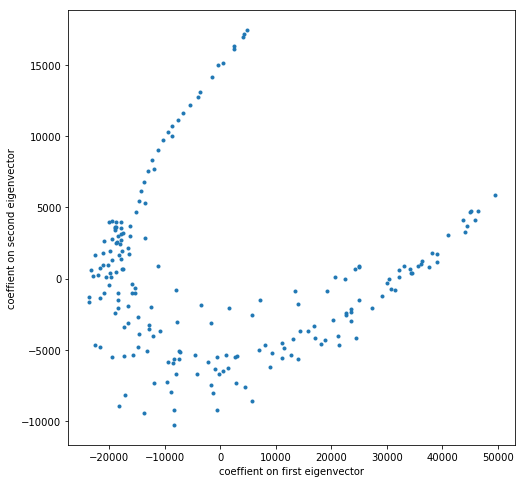

In [83]:
plt.figure(figsize=(8,8))
plt.plot(transformed_X[:, 0], transformed_X[:, 1], '.')
plt.xlabel('coeffient on first eigenvector')
plt.ylabel('coeffient on second eigenvector')
plt.show()

# Test

In [2]:
import numpy as np

In [3]:
x1 = np.array([1,2,3]).reshape(3,1)
x2 = np.array([1,-2,3]).reshape(3,1)
x3 = np.array([0,-1,-1]).reshape(3,1)

In [6]:
x3

array([[ 0],
       [-1],
       [-1]])

In [7]:
x1/np.linalg.norm(x1)

array([[ 0.26726124],
       [ 0.53452248],
       [ 0.80178373]])

In [11]:
64 + 1600 + 24**2

2240

In [23]:
q, r = np.linalg.qr(np.hstack((x3, x2, x1)))

In [24]:
q

array([[ 0.        ,  0.27216553,  0.96225045],
       [ 0.70710678, -0.68041382,  0.19245009],
       [ 0.70710678,  0.68041382, -0.19245009]])

In [25]:
r

array([[-1.41421356,  0.70710678,  3.53553391],
       [ 0.        ,  3.67423461,  0.95257934],
       [ 0.        ,  0.        ,  0.76980036]])

In [69]:
q[:, 0] = -q[:, 0]

In [70]:
q

array([[-0.        ,  0.27216553,  0.96225045],
       [-0.70710678, -0.68041382,  0.19245009],
       [-0.70710678,  0.68041382, -0.19245009]])

In [71]:
q.T@q

array([[  1.00000000e+00,  -2.32483873e-17,  -1.44535130e-16],
       [ -2.32483873e-17,   1.00000000e+00,   2.99851774e-17],
       [ -1.44535130e-16,   2.99851774e-17,   1.00000000e+00]])